## Load Raw Abacus Halos and Port them to ltu-cmass

This notebook loads raw Abacus CompaSO halos and stores them in ltu-cmass format. These are the 'Cleaned' CompaSO halos at z=0.5, loaded for the broader emulator grid c130-181 at the `base` resolution.


Access defined here: https://abacussummit.readthedocs.io/en/latest/data-access.html

Source DOI: https://doi.ccs.ornl.gov/dataset/4ef85a56-db03-512c-a4b7-5835ecffe28c

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import matplotlib as mpl
mpl.style.use('../../style.mcstyle')   # noqa
from matplotlib import pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from tqdm import tqdm
import h5py
from collections import defaultdict

from astropy.cosmology import Planck18
cosmo = Planck18

In [10]:

from abacusnbody.data.compaso_halo_catalog import CompaSOHaloCatalog
lhid = 158

awdir = '/anvil/scratch/x-mho1/abacus/base'
simdir = join(awdir, f'AbacusSummit_base_c{lhid}_ph000',
              'halos', 'z0.500', 'halo_info/halo_info_000.asdf')
# , subsamples=dict(A=True, pos=True))
cat = CompaSOHaloCatalog(simdir, verbose=True, fields=['x_com', 'v_com'])

2 halo catalog fields (1 cleaned) requested. Reading 3 fields from disk. Computing 0 intermediate fields.

CompaSO Halo Catalog
AbacusSummit_base_c158_ph000 @ z=0.5
------------------------------------
     Halos: 1.17e+07 halos,       3 fields,   0.327 GB
Subsamples:        0 particles,   0 fields,       0 GB
Cleaned halos: True
Halo light cone: False


In [11]:
cat.header['Omega_M']

0.307463

In [12]:
ss = 10000

pos = np.array(cat.halos['x_com'][::ss])+1e3  # Mpc/h
vel = np.array(cat.halos['v_com'][::ss])  # km/s
pos.min(axis=0), pos.max(axis=0), vel.min(axis=0), vel.max(axis=0)

(array([0.16900635, 0.49371338, 3.56958   ], dtype=float32),
 array([  59.873535, 1999.7104  , 1999.9563  ], dtype=float32),
 array([-1240.5787, -1267.0242, -1167.5333], dtype=float32),
 array([1144.864 , 1070.436 , 1269.1515], dtype=float32))

In [ ]:
from copy import deepcopy
factor = cat.header['BoxSize']/cat.header['VelZSpace_to_kms']

zpos = deepcopy(pos)
zpos[:, 0] = zpos[:, 0] + factor * vel[:, 0]
zpos %= 2e3

In [35]:
abaparams.loc[130]

0    0.313772
1    0.049302
2    0.673600
3    0.964900
4    0.711201
Name: 130, dtype: float64

In [ ]:
from cmass.utils import cosmo_to_astropy
import redshift_space_library as RSL
z = cat.header['Redshift']
L = 2000

abaparams = pd.read_csv(
    '/home/x-mho1/git/ltu-cmass-run/params/abacus_cosmologies.txt', header=None, delimiter=' ')
abaparams = abaparams.iloc[130:181]

cosmo = abaparams.loc[130]
cosmo = cosmo_to_astropy(cosmo)

axis = 0
pos, vel = map(np.ascontiguousarray, (pos, vel))
zpos1 = deepcopy(pos)
RSL.pos_redshift_space(zpos1, vel, L, cosmo.H(z).value/cosmo.h, z, axis)

In [38]:
factor - (1+z)/(cosmo.H(z).value/cosmo.h)

-1.0955024803815244e-05

[0.5163574  2.668518   0.43096924 0.7384033  0.14727783]
[1.9974716e+03 4.1559911e-01 1.9981429e+03 1.9991825e+03 3.6994622e+00]
[1.9974686e+03 4.1342330e-01 1.9981407e+03 1.9991810e+03 3.7028928e+00]


(array([  1.,  11.,  28., 123., 230., 317., 264., 138.,  39.,  14.]),
 array([-0.0115242 , -0.0094593 , -0.00739441, -0.00532951, -0.00326462,
        -0.00119972,  0.00086517,  0.00293007,  0.00499496,  0.00705986,
         0.00912476]),
 <BarContainer object of 10 artists>)

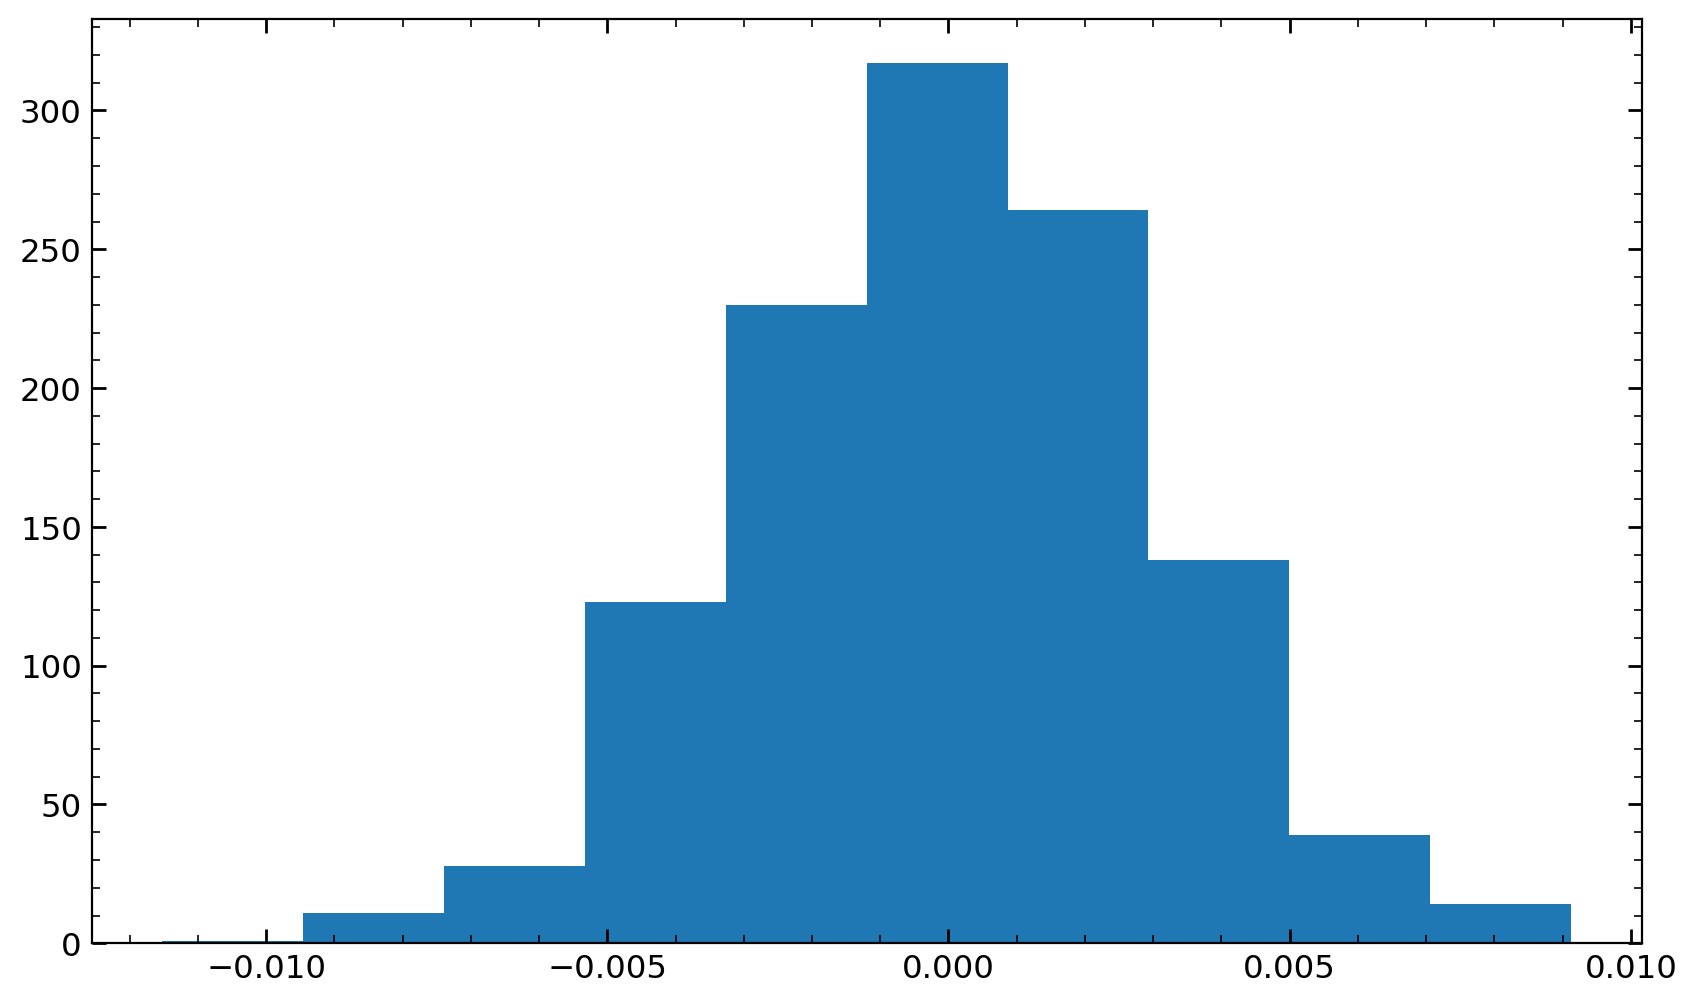

In [ ]:
print(pos[:5, 0])
print(zpos[:5, 0])
print(zpos1[:5, 0])

plt.hist(zpos[:, 0]-zpos1[:, 0])

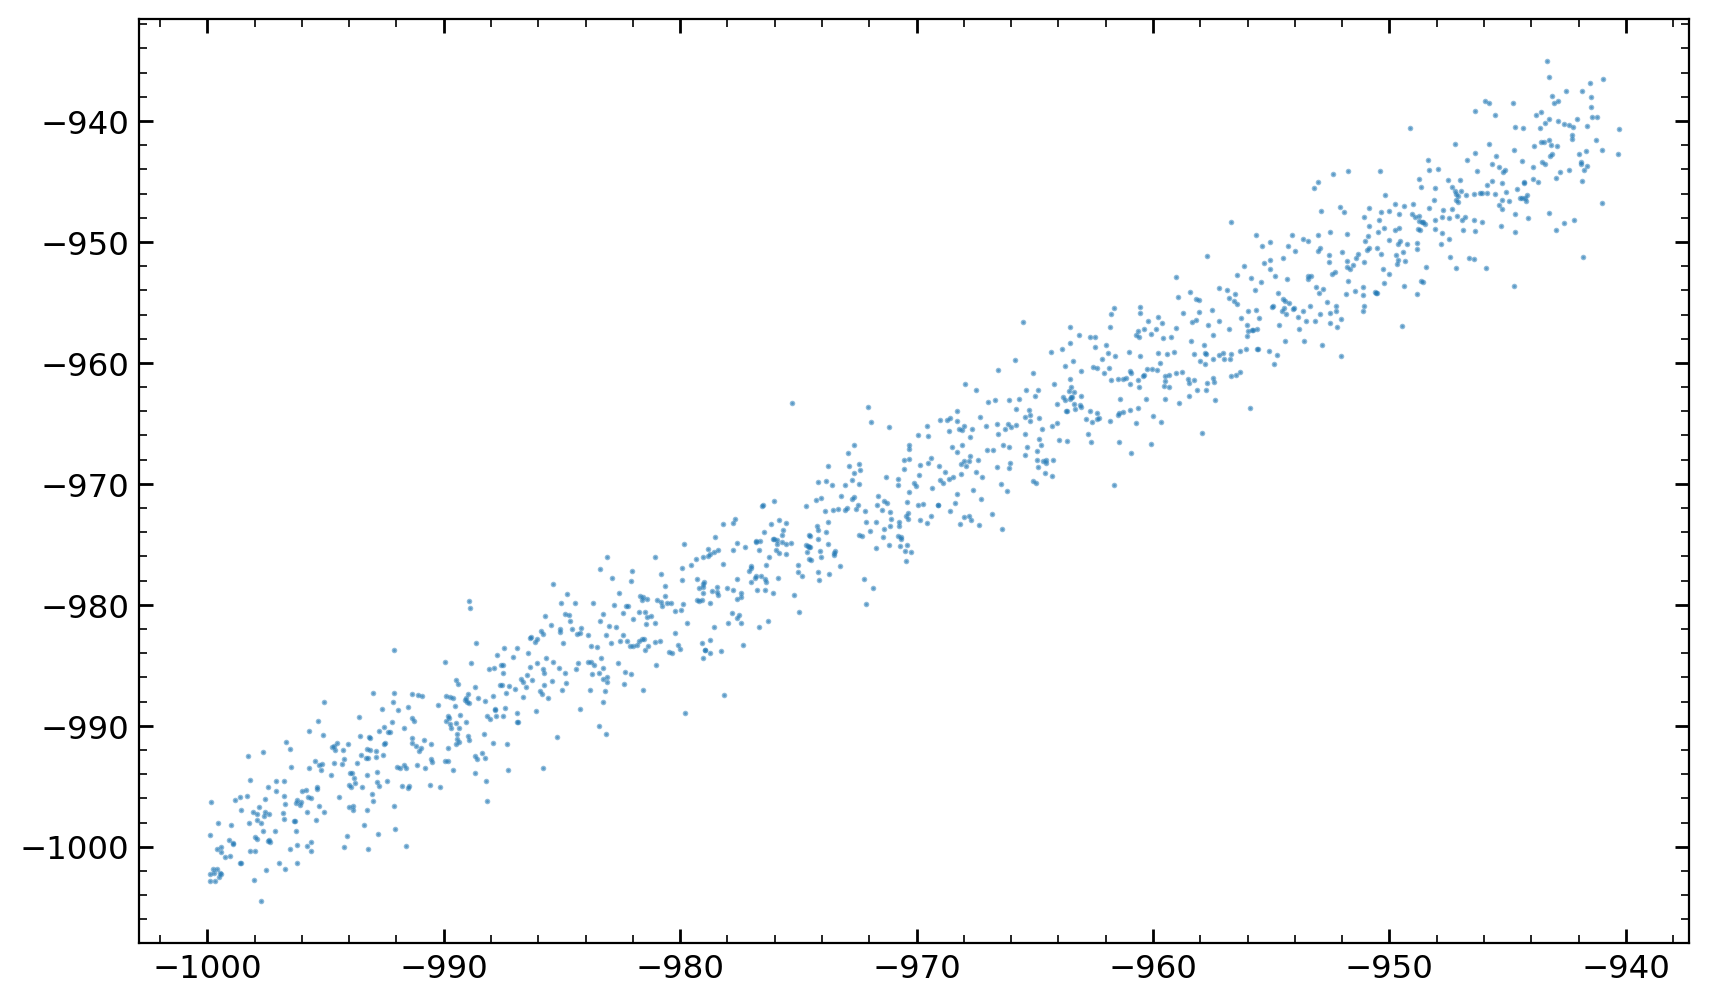

In [ ]:
plt.plot(pos[:, 0], zpos[:, 0], 'o', markersize=1, alpha=0.5)

In [7]:
from abacusnbody.data import compaso_halo_catalog
compaso_halo_catalog.user_dt.names

('id',
 'npstartA',
 'npstartB',
 'npoutA',
 'npoutB',
 'ntaggedA',
 'ntaggedB',
 'N',
 'L2_N',
 'L0_N',
 'x_com',
 'v_com',
 'sigmav3d_com',
 'meanSpeed_com',
 'sigmav3d_r50_com',
 'meanSpeed_r50_com',
 'r100_com',
 'vcirc_max_com',
 'SO_central_particle',
 'SO_central_density',
 'SO_radius',
 'x_L2com',
 'v_L2com',
 'sigmav3d_L2com',
 'meanSpeed_L2com',
 'sigmav3d_r50_L2com',
 'meanSpeed_r50_L2com',
 'r100_L2com',
 'vcirc_max_L2com',
 'SO_L2max_central_particle',
 'SO_L2max_central_density',
 'SO_L2max_radius',
 'sigmavMin_com',
 'sigmavMid_com',
 'sigmavMaj_com',
 'r10_com',
 'r25_com',
 'r33_com',
 'r50_com',
 'r67_com',
 'r75_com',
 'r90_com',
 'r95_com',
 'r98_com',
 'sigmar_com',
 'sigman_com',
 'sigmar_eigenvecsMin_com',
 'sigmar_eigenvecsMid_com',
 'sigmar_eigenvecsMaj_com',
 'sigmav_eigenvecsMin_com',
 'sigmav_eigenvecsMid_com',
 'sigmav_eigenvecsMaj_com',
 'sigman_eigenvecsMin_com',
 'sigman_eigenvecsMid_com',
 'sigman_eigenvecsMaj_com',
 'sigmavrad_com',
 'sigmavtan_com',
 

In [7]:
af

NameError: name 'af' is not defined